# Criação de Gráficos

In [47]:
import pandas as pd

In [48]:
df = pd.read_csv("dados-imersao.csv")

In [49]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133339 entries, 0 to 133338
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ano              133339 non-null  int64 
 1   senioridade      133339 non-null  object
 2   contrato         133339 non-null  object
 3   cargo            133339 non-null  object
 4   salario          133339 non-null  int64 
 5   moeda            133339 non-null  object
 6   usd              133339 non-null  int64 
 7   residencia       133339 non-null  object
 8   remoto           133339 non-null  int64 
 9   empresa          133339 non-null  object
 10  tamanho_empresa  133339 non-null  object
dtypes: int64(4), object(7)
memory usage: 11.2+ MB


In [51]:
senioridade = {
    'SE': 'senior',
    'MI': 'pleno',
    'EN': 'junior',
    'EX': 'executivo'
}
df['senioridade'] = df['senioridade'].replace(senioridade)
df['senioridade'].value_counts()

senioridade
senior       77236
pleno        40462
junior       12441
executivo     3200
Name: count, dtype: int64

<Axes: title={'center': 'Distribuição dos níveis de experiência'}, xlabel='senioridade'>

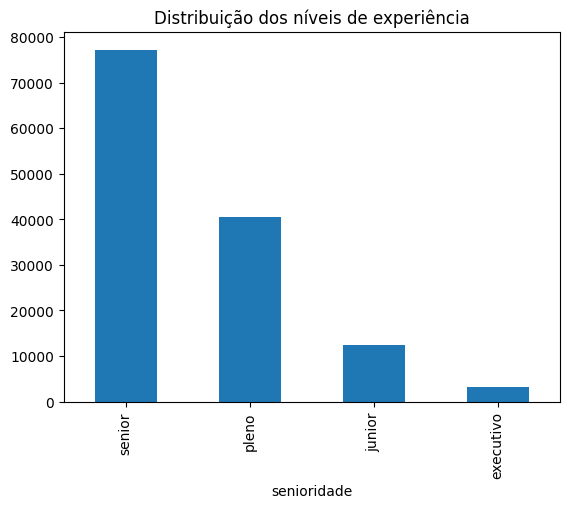

In [52]:
df['senioridade'].value_counts().plot(kind='bar', title='Distribuição dos níveis de experiência')

# .plot() é um método do pandas que permite criar gráficos diretamente a partir de DataFrames ou Series. O parâmetro kind='bar' especifica que queremos um gráfico de barras, e o parâmetro title define o título do gráfico.

## Criando o primeiro gráfico com Seaborn

In [53]:
import seaborn as sns

<Axes: xlabel='senioridade', ylabel='usd'>

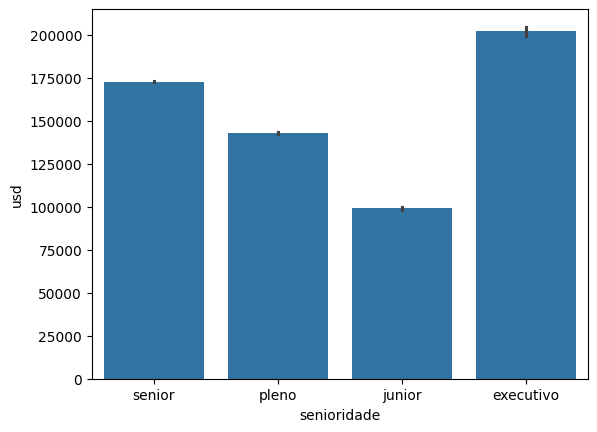

In [ ]:
sns.barplot(data=df, x='senioridade', y='usd', estimator='mean')
# barplot é uma função da biblioteca Seaborn que cria gráficos de barras. O parâmetro data especifica o DataFrame a ser usado, x e y definem as variáveis a serem plotadas, e estimator='mean' indica que queremos calcular a média dos valores de y para cada categoria em x.

## Formatando o gráfico com Matplotlib

In [55]:
import matplotlib.pyplot as plt

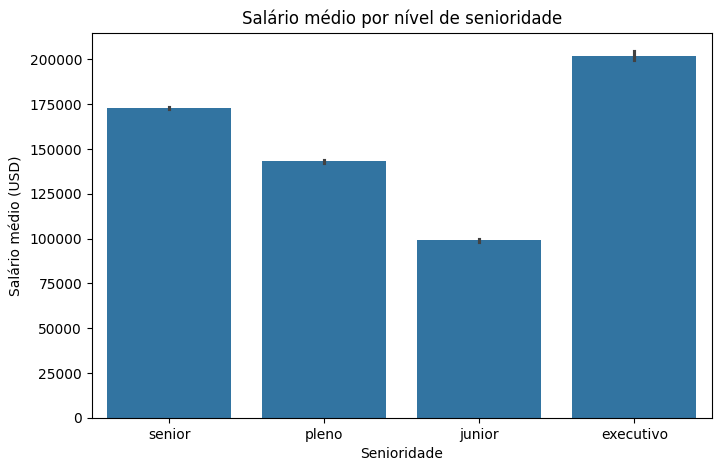

In [56]:
plt.figure(figsize=(8, 5))  # Define o tamanho da figura
sns.barplot(data=df, x='senioridade', y='usd', estimator='mean') # Cria o gráfico de barras
plt.title('Salário médio por nível de senioridade') # Define o título do gráfico
plt.ylabel('Salário médio (USD)') # Define o rótulo do eixo Y
plt.xlabel('Senioridade') # Define o rótulo do eixo X
plt.show()  # Exibe o gráfico

In [ ]:
df.groupby('senioridade')['usd'].mean().sort_values(ascending=False)

# groupby é um método do pandas que agrupa os dados com base em uma ou mais colunas. No exemplo, estamos agrupando os dados pela coluna 'senioridade' e calculando a média dos valores na coluna 'usd' para cada grupo. O método sort_values(ascending=False) ordena os resultados em ordem decrescente.

senioridade
executivo    202027.667813
senior       172850.838301
pleno        143044.845979
junior        99034.963267
Name: usd, dtype: float64

In [ ]:
ordem = df.groupby('senioridade')['usd'].mean().sort_values(ascending=False).index

# groupby é um método do pandas que agrupa os dados com base em uma ou mais colunas. No exemplo, estamos agrupando os dados pela coluna 'senioridade' e calculando a média dos valores na coluna 'usd' para cada grupo. O método sort_values(ascending=False) ordena os resultados em ordem decrescente. O atributo index retorna os rótulos dos índices do objeto Series resultante.
 
ordem

Index(['executivo', 'senior', 'pleno', 'junior'], dtype='object', name='senioridade')

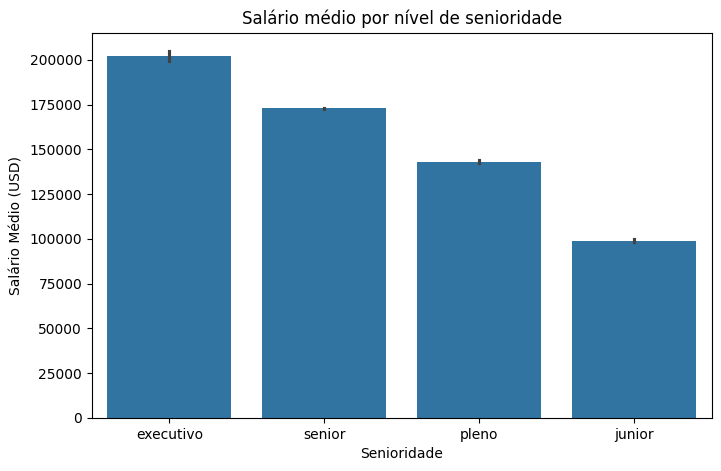

In [ ]:
plt.figure(figsize=(8, 5)) # Define o tamanho da figura
sns.barplot(data=df, x='senioridade', y='usd', estimator='mean', order=ordem) # Cria o gráfico de barras com a ordem personalizada
plt.title('Salário médio por nível de senioridade') # Define o título do gráfico
plt.ylabel('Salário Médio (USD)') # Define o rótulo do eixo Y
plt.xlabel('Senioridade') # Define o rótulo do eixo X
plt.show() # Exibe o gráfico

### Analisando a distribuição dos salários
Histograma

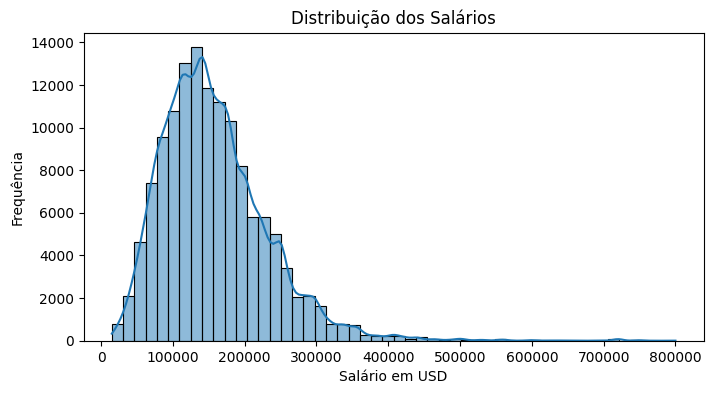

In [ ]:
plt.figure(figsize=(8, 4)) # Define o tamanho da figura
sns.histplot(df['usd'], bins=50, kde=True) # o histplot é uma função da biblioteca Seaborn que cria histogramas. O parâmetro bins define o número de barras no histograma, e kde=True adiciona uma estimativa de densidade kernel ao gráfico.
plt.title('Distribuição dos Salários')
plt.xlabel('Salário em USD')
plt.ylabel('Frequência')
plt.show()

### Boxplot

c:\Users\yago2\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


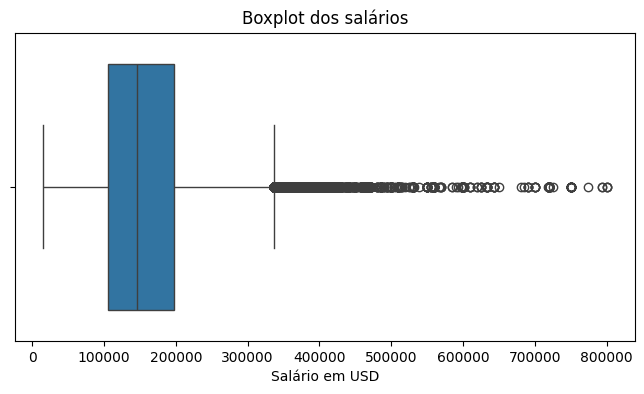

In [ ]:
plt.figure(figsize=(8, 4)) # Define o tamanho da figura
sns.boxplot(x=df['usd']) # boxplot é uma função da biblioteca Seaborn que cria gráficos de caixa. O parâmetro x define a variável a ser plotada.
plt.title('Boxplot dos salários')
plt.xlabel('Salário em USD')
plt.show()
     

### Como é a distribuição dos salários de acordo com níveis de senioridade?

c:\Users\yago2\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


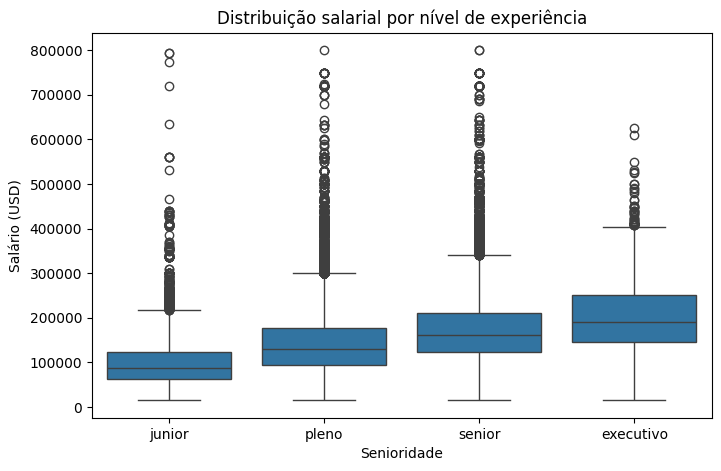

In [ ]:
ordem_senioridade = ['junior', 'pleno', 'senior', 'executivo']

plt.figure(figsize=(8, 5)) # Define o tamanho da figura
sns.boxplot(x='senioridade', y='usd', data=df, order=ordem_senioridade) # boxplot é uma função da biblioteca Seaborn que cria gráficos de caixa. Os parâmetros x e y definem as variáveis a serem plotadas, data especifica o DataFrame a ser usado, e order define a ordem personalizada das categorias no eixo x.
plt.title('Distribuição salarial por nível de experiência')
plt.xlabel('Senioridade')
plt.ylabel('Salário (USD)')
plt.show()


### Se quisermos adicionar uma paleta de cores:

c:\Users\yago2\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\yago2\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\yago2\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\yago2\AppData\Local\Programs\Python\Python311

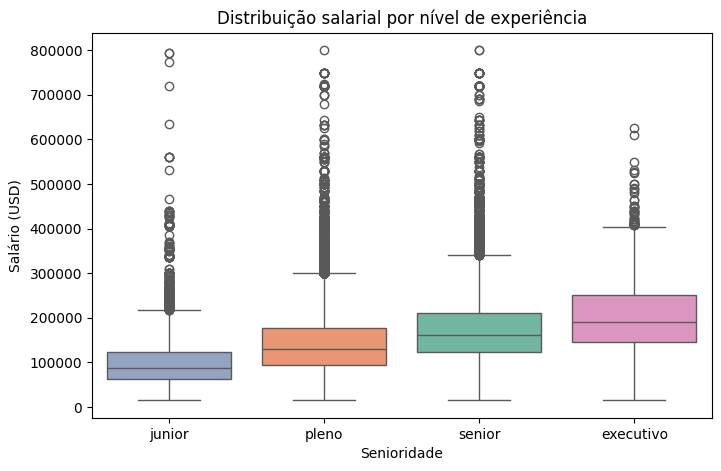

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='senioridade', y='usd', data=df, order=ordem_senioridade, palette='Set2', hue='senioridade')
# boxplot é uma função da biblioteca Seaborn que cria gráficos de caixa. Os parâmetros x e y definem as variáveis a serem plotadas, data especifica o DataFrame a ser usado, order define a ordem personalizada das categorias no eixo x, palette define a paleta de cores a ser usada, e hue adiciona uma variável categórica para dividir os dados em subgrupos.
plt.title('Distribuição salarial por nível de experiência')
plt.xlabel('Senioridade')
plt.ylabel('Salário (USD)')
plt.show()

### Qual país paga o maior média salarial para cientistas de dados especificamente?

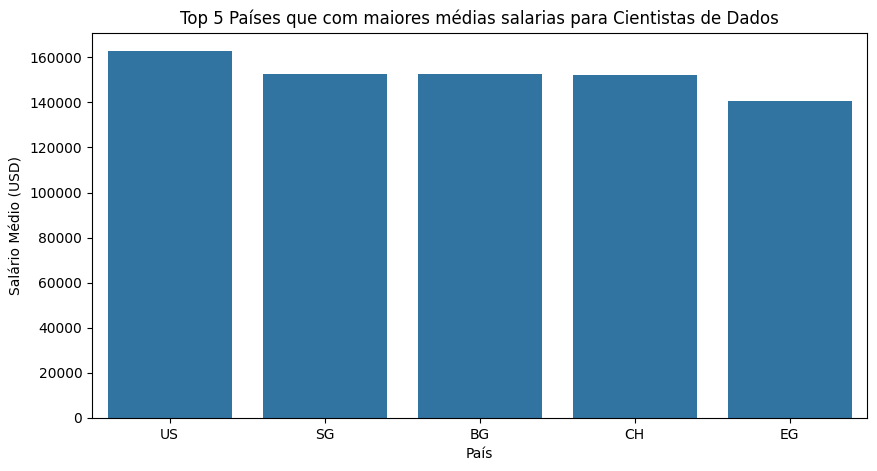

In [ ]:
df_ds = df[df['cargo'] == 'Data Scientist'] # Filtra o DataFrame para incluir apenas os cargos de Cientista de Dados
media_ds = df_ds.groupby('residencia')['usd'].mean().sort_values(ascending=False).reset_index()
# Agrupa os dados por país de residência, calcula a média salarial em USD, ordena em ordem decrescente e reseta o índice. No exemplo, estamos agrupando os dados pela coluna 'residencia' e calculando a média dos valores na coluna 'usd' para cada grupo. O método sort_values(ascending=False) ordena os resultados em ordem decrescente, e reset_index() reseta o índice do DataFrame resultante.

plt.figure(figsize=(10, 5))
sns.barplot(x='residencia', y='usd', data=media_ds.head(5))     
# Cria um gráfico de barras para os 5 países com as maiores médias salariais
plt.title('Top 5 Países que com maiores médias salarias para Cientistas de Dados')
plt.xlabel('País')
plt.ylabel('Salário Médio (USD)')
plt.show()

US - Estados Unidos

SG - Singapura

BG - Bulgária

CH - Suiça

EG - Egito

### Criando gráficos interativos com Plotly

In [65]:
import plotly.express as px

### Qual é a média salarial por nível de senioridade?

In [ ]:
# Calcular média salarial
media_senioridade = df.groupby('senioridade')['usd'].mean().reset_index()

# Criar gráfico
fig = px.bar(media_senioridade, x='senioridade', y='usd',
             title='Salário Médio por Nível de Senioridade',
             labels={'senioridade': 'Senioridade', 'usd': 'Salário Médio (USD)'},
             color='senioridade')
# o px.bar é uma função da biblioteca Plotly Express que cria gráficos de barras. Os parâmetros x e y definem as variáveis a serem plotadas, title define o título do gráfico, labels personaliza os rótulos dos eixos, e color adiciona uma variável categórica para colorir as barras.


fig.update_layout(xaxis={'categoryorder': 'total descending'})
# o update_layout é um método do Plotly que permite atualizar o layout do gráfico. No exemplo, estamos ordenando as categorias do eixo x em ordem decrescente com base nos valores totais.
fig.show()

c:\Users\yago2\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


### Qual é a proporção dos tipos de trabalho?

In [ ]:
remoto_contagem = df['remoto'].value_counts().reset_index()
# Conta a frequência de cada categoria na coluna 'remoto' e reseta o índice
remoto_contagem.columns = ['tipo_trabalho', 'quantidade'] 
# Renomeia as colunas do DataFrame para 'tipo_trabalho' e 'quantidade'

fig = px.pie(
    remoto_contagem,
    names='tipo_trabalho',
    values='quantidade',
    title='Proporção dos Tipos de Trabalho',
    hole=0.5  # opcional: transforma em donut chart
) # px.pie é uma função da biblioteca Plotly Express que cria gráficos de pizza. Os parâmetros names e values definem as categorias e seus valores correspondentes, title define o título do gráfico, e hole adiciona um buraco no centro do gráfico para criar um gráfico de rosca (donut chart).

fig.update_traces(textinfo='percent+label') # Atualiza as informações exibidas nas fatias do gráfico para mostrar porcentagens e rótulos
fig.show()

### Qual é o Top 5 de melhores médias salariais por cargo?

In [ ]:
top_cargos = df.groupby('cargo')['usd'].mean().round(2).sort_values(ascending=False).head().reset_index() 
# Calcula a média salarial por cargo, arredonda para 2 casas decimais, ordena em ordem decrescente, seleciona os 5 principais cargos e reseta o índice
top_cargos

,cargo,usd
0,Research Team Lead,450000.0
1,Analytics Engineering Manager,399880.0
2,Data Science Tech Lead,375000.0
3,Applied AI ML Lead,292500.0
4,Head of Applied AI,273875.0


In [ ]:
# Gráfico interativo
fig = px.bar(
    top_cargos,
    x='cargo',
    y='usd',
    title='Top 5 cargos com maiores médias salariais',
    labels={'usd': 'Salário médio (USD)', 'cargo': 'Cargo'}
)
 # px.bar é uma função da biblioteca Plotly Express que cria gráficos de barras. Os parâmetros x e y definem as variáveis a serem plotadas, title define o título do gráfico, e labels personaliza os rótulos dos eixos.

fig.update_layout(xaxis_title='Cargo', yaxis_title='Salário médio (USD)') # Atualiza os títulos dos eixos
fig.show()

### Mapa do salário médio do Cientista de Dados por país

In [70]:
pip install pycountry


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 6.3/6.3 MB 2.4 MB/s eta 0:00:00


In [ ]:
import pycountry

# Função para converter ISO-2 para ISO-3
def iso2_to_iso3(code): # Converte códigos de país ISO-2 para ISO-3 usando a biblioteca pycountry
    try:
        return pycountry.countries.get(alpha_2=code).alpha_3
    except:
        return None

# Criar nova coluna com código ISO-3
df['residencia_iso3'] = df['residencia'].apply(iso2_to_iso3) 
# Aplica a função iso2_to_iso3 à coluna 'residencia' e cria uma nova coluna 'residencia_iso3' com os códigos ISO-3 correspondentes

# Calcular média salarial por país (ISO-3)
df_ds = df[df['cargo'] == 'Data Scientist'] # Filtra o DataFrame para incluir apenas os cargos de Cientista de Dados
media_ds_pais = df_ds.groupby('residencia_iso3')['usd'].mean().reset_index() # Agrupa os dados por código ISO-3 de residência, calcula a média salarial em USD e reseta o índice

# Gerar o mapa
fig = px.choropleth(media_ds_pais,
                    locations='residencia_iso3',
                    color='usd',
                    color_continuous_scale='rdylgn',
                    title='Salário médio de Cientista de Dados por país',
                    labels={'usd': 'Salário médio (USD)', 'residencia_iso3': 'País'})
# px.choropleth é uma função da biblioteca Plotly Express que cria mapas coropléticos. Os parâmetros locations e color definem as localizações geográficas e os valores a serem representados, color_continuous_scale define a escala de cores, title define o título do gráfico, e labels personaliza os rótulos dos eixos.

fig.show()

In [72]:
df.to_csv('dados-imersao-final.csv', index=False)